<a href="https://colab.research.google.com/github/DhrumilV/EDA-Retail-Superstore-Analysis/blob/main/EDA%20Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORATORY DATA ANALYSIS - RETAIL**

---


#**DATA SCIENCE AND BUSINESS ANALYTICS INTERN** 

@


# **` THE SPARKS FOUNDATION`**


Dataset : https://bit.ly/3i4rbWl



---


##By : Dhrumil Vadgama




#Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Dataset

In [35]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [36]:
df.drop(columns=['Country','Postal Code'],inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [37]:
# Checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [38]:
# Statistical Data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [39]:
# Finding Uniques Values for each column
df.nunique() 

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

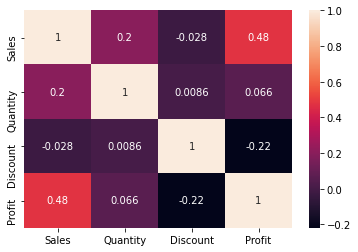

In [40]:
# Correlation Heatmap between Attributes
sns.heatmap(df.corr(),annot=True)


*   Moderate Corrrelation between Profit and Sales
*   Almost NO Correlation between Discount and Quantity or Discount and Sales. Also Low Negative Correlation between Discount and Profit.
*   Hence, `**Discount given by store is NOT useful**` as it is not able to boost Quantities sold or Sales and also affects profit in negatively.






#State Wise Analysis

In [51]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

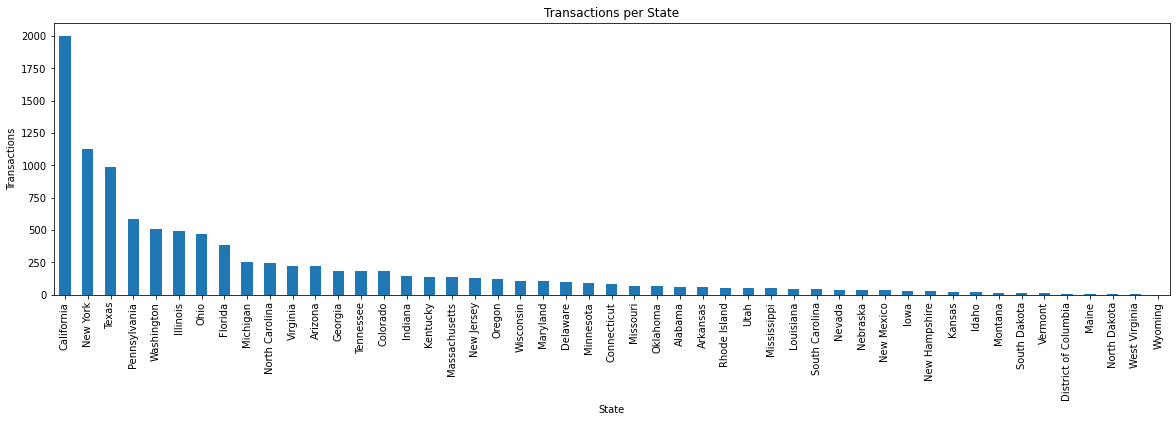

In [124]:
# Transactions per state
state_trans = df['State'].value_counts()
state_trans.plot(kind='bar',figsize=(20,5),xlabel='State',ylabel='Transactions', title='Transactions per State')

State with most Transactions/Orders:


1.   California
2.   New York
3.   Texas



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


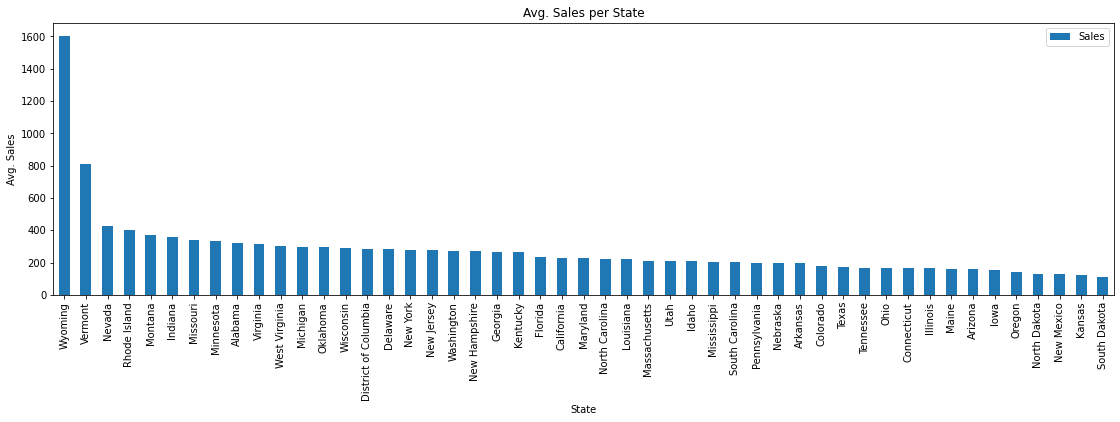

In [127]:
# Avg. Sales per State
state_sales = df.groupby(['State'])['State','Sales'].mean().sort_values('Sales',ascending=False)
state_sales.plot(kind='bar',figsize=(19,5),xlabel='State',ylabel='Avg. Sales',title='Avg. Sales per State')

State with most Sales:


1.   Wyoming
2.   Vermont
3.   Nevada



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


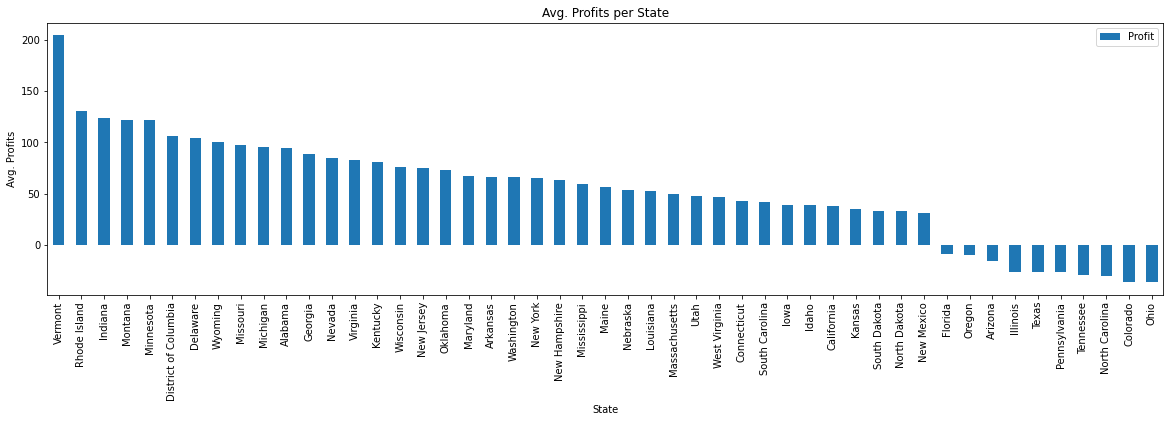

In [125]:
# Avg. Profits per State
state_profits = df.groupby(['State'])['State','Profit'].mean().sort_values('Profit',ascending=False)
state_profits.plot(kind='bar',figsize=(20,5),xlabel='State',ylabel='Avg. Profits',title='Avg. Profits per State')

State with most profits:


1.   Vermont
2.   Rhode Island
3.   Indiana

State with most losses:


1.   Ohio
2.   Colorado
3.   North Carolina




#City Wise Analysis

In [133]:
len(df['City'].unique())

531

As there are total 531 cities, I will analyse top 30.

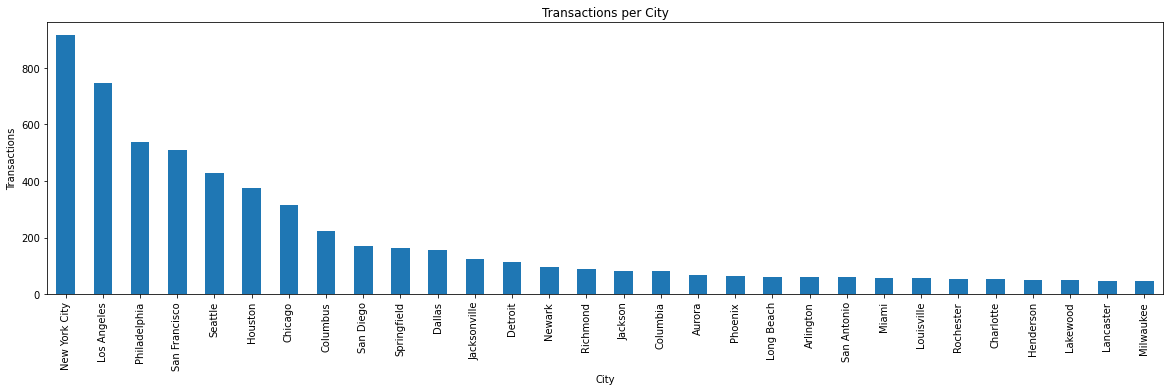

In [144]:
city_df = df['City'].value_counts()[:30]
city_df.plot(kind='bar',figsize=(20,5),xlabel='City',ylabel='Transactions', title='Transactions per City')

City with most Transactions/Orders:


1.   New York City
2.   Los Angelos
3.   Philadelphia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


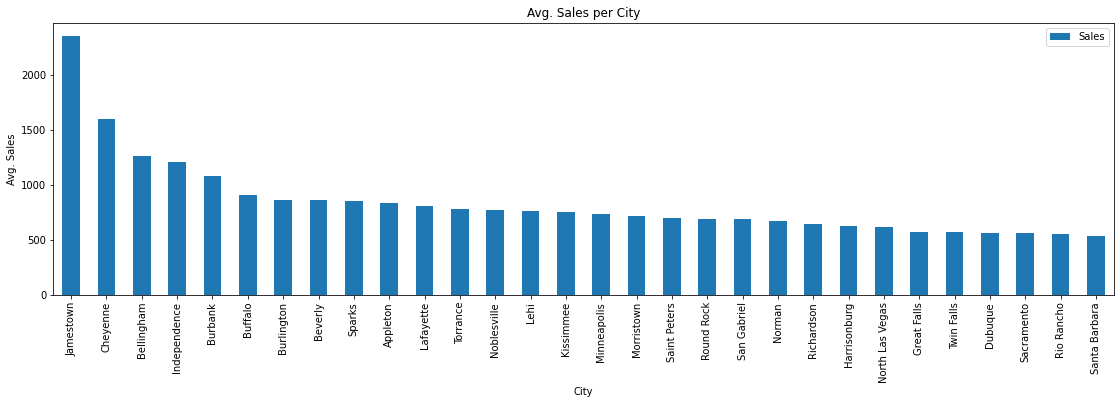

In [145]:
# Avg. Sales per City
city_sales = df.groupby(['City'])['City','Sales'].mean().sort_values('Sales',ascending=False)[:30]
city_sales.plot(kind='bar',figsize=(19,5),xlabel='City',ylabel='Avg. Sales',title='Avg. Sales per City')


City with most sales:


1.   Jamestown
2.   Cheyenne
3.   Bellingham



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


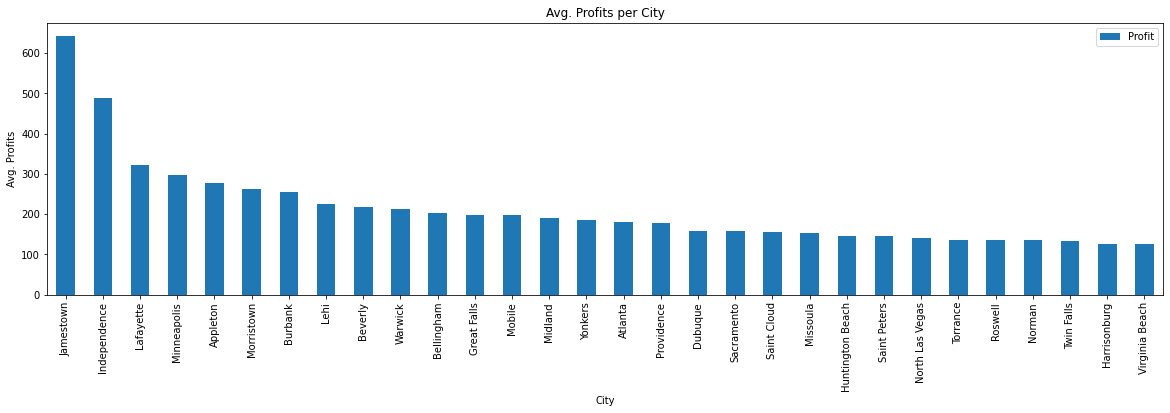

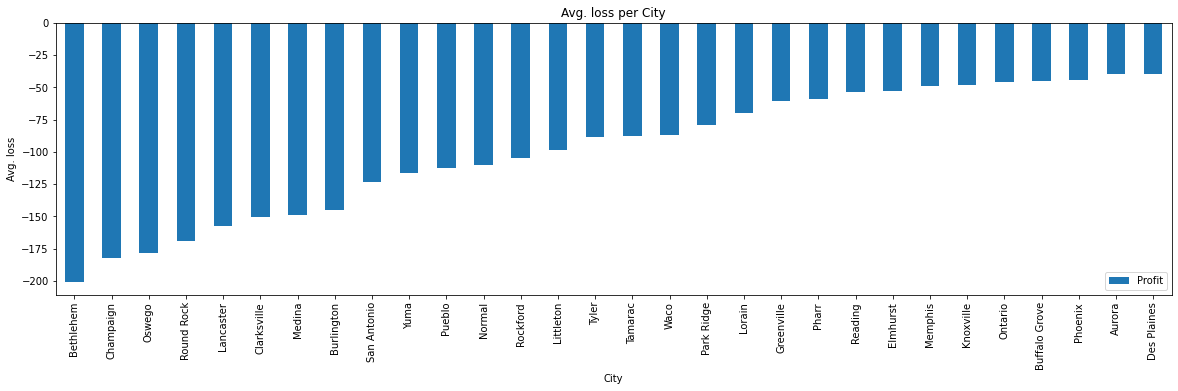

In [164]:
# Avg. Profits per City
city_profits = df.groupby(['City'])['City','Profit'].mean().sort_values('Profit',ascending=False)[:30]
city_profits.plot(kind='bar',figsize=(20,5),xlabel='City',ylabel='Avg. Profits',title='Avg. Profits per City')
# Avg. Losses per City
city_loss = df.groupby(['City'])['City','Profit'].mean().sort_values('Profit',ascending=True)[:30]
city_loss.plot(kind='bar',figsize=(20,5),xlabel='City',ylabel='Avg. loss',title='Avg. loss per City')


City with most profits:

1.   Jamestown
2.   Independence
3.   Lafayette

City with most losses:

1.   Bethlehem
2.   Champaign
3.   Oswego




# Category Wise Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


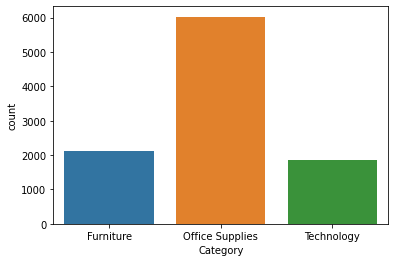

In [149]:
sns.countplot(df['Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


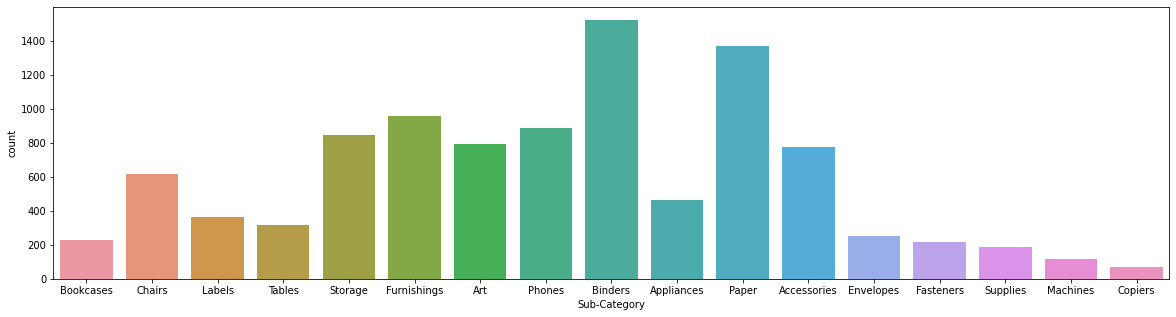

In [162]:
plt.figure(figsize=(20,5))
sns.countplot(df['Sub-Category'])

In [188]:
cat_df = df.groupby(['Category'])[['Category','Sales', 'Profit']].mean()
cat_df.head()

,Sales,Profit
Category,,
Furniture,349.834887,8.699327
Office Supplies,119.324101,20.327050
Technology,452.709276,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f069654bf50>,
      dtype=object)

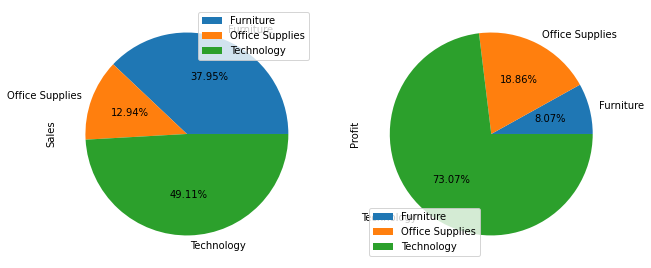

In [190]:
cat_df.plot.pie(subplots=True, figsize=(10, 10), autopct='%.2f%%', labels = cat_df.index)

Maximum Sales and Profits in **`Technology`** 

Sales

In [228]:
sub_cat_df = df.groupby(['Sub-Category'])[['Sub-Category','Sales']].mean()
sub_cat_df.head()

,Sales
Sub-Category,
Accessories,215.974604
Appliances,230.755710
Art,34.068834
Binders,133.560560
Bookcases,503.859633


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f068b552190>],
      dtype=object)

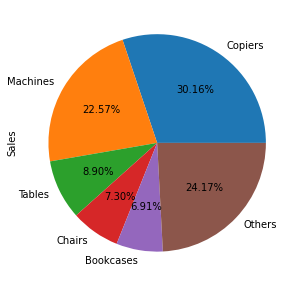

In [229]:
sub_cat_df1 = sub_cat_df.sort_values('Sales',ascending=False)[:5].reset_index()
sub_cat_df2 = sub_cat_df.sort_values('Sales',ascending=False)[5:]

# Adding other sub-category values to top 5 as others

sales_others = sub_cat_df2['Sales'].sum()

temp_df = {'Sub-Category': 'Others','Sales':sales_others}
sub_cat_df1 = sub_cat_df1.append(temp_df, ignore_index = True)
sub_cat_df1.set_index('Sub-Category',inplace=True)

# Pie Plot for Sales
sub_cat_df1['Sales'].plot.pie(subplots=True, figsize=(5, 5), autopct='%.2f%%', labels = sub_cat_df1.index)

**`Copiers`** have the highest sales with **`30.16 %`**.

Profits

In [232]:
sub_cat_df = df.groupby(['Sub-Category'])[['Sub-Category','Profit']].mean()
sub_cat_df.head()

,Profit
Sub-Category,
Accessories,54.111788
Appliances,38.922758
Art,8.200737
Binders,19.843574
Bookcases,-15.230509


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f068aad7110>],
      dtype=object)

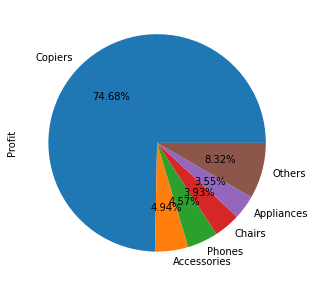

In [235]:
sub_cat_df1 = sub_cat_df.sort_values('Profit',ascending=False)[:5].reset_index()
sub_cat_df2 = sub_cat_df.sort_values('Profit',ascending=False)[5:]

# Adding other sub-category values to top 5 as others

profit_others = sub_cat_df2['Profit'].sum()

temp_df = {'Sub-Category': 'Others','Profit':profit_others}
sub_cat_df1 = sub_cat_df1.append(temp_df, ignore_index = True)
sub_cat_df1.set_index('Sub-Category',inplace=True)

# Pie Plot for Profit
sub_cat_df1['Profit'].plot.pie(subplots=True, figsize=(5, 5), autopct='%.2f%%', labels = sub_cat_df1.index)

**`Copiers`** have the highest sales with **`74.68 %`**.



Sales and Profit Comparision

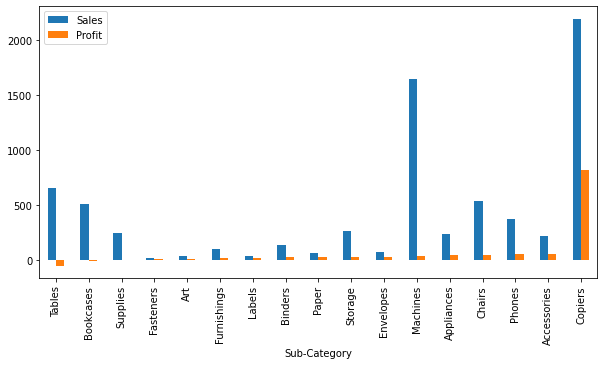

In [239]:
sub_cat_df = df.groupby(['Sub-Category'])[['Sub-Category','Sales','Profit']].mean()
sub_cat_df.sort_values('Profit')[['Sales','Profit']].plot(kind='bar', figsize= (10,5), label=['Avg. Sales Price','Profit'])

As we have seen earlier in pie charts, **`Copiers`** have highest Sales as well as Profits. 

#Region Wise Analysis

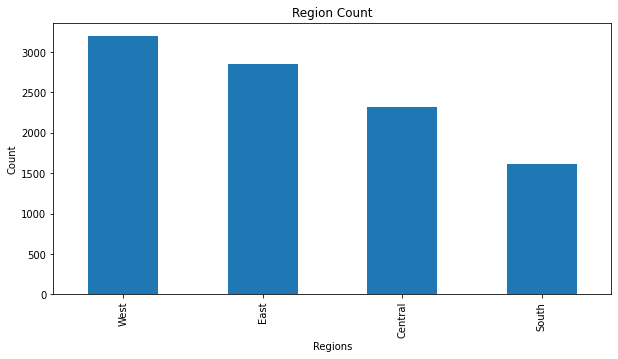

In [263]:
reg_df = df['Region'].value_counts()
reg_df.plot(kind='bar',figsize=(10,5),xlabel='Regions',ylabel='Count', title='Region Count')

In [272]:
reg_df = df.groupby(['Region'])[['Region','Sales', 'Profit']].mean()
reg_df

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.493233,33.849032


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0695350c10>,
      dtype=object)

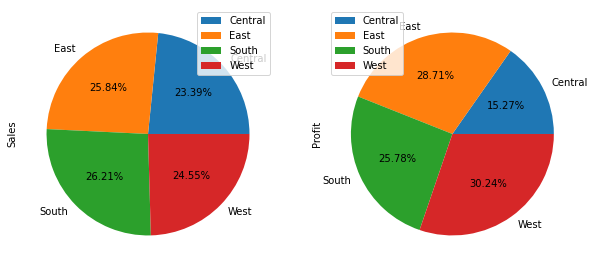

In [273]:
# Pie Plot for Sales and Profits according to Regions
reg_df.plot.pie(subplots=True, figsize=(10, 10), autopct='%.2f%%', labels = reg_df.index)

Sales are almost equally distributed in all of the regions whereas **`WEST` has `Highest Profits` i.e. `30.24 %`** and **`CENTRAL` has `Lowest Profits` i.e. `15.27 %`**. 

#Ship Mode Wise Analysis


In [274]:
ship_df = df['Ship Mode'].value_counts()
ship_df

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [275]:
ship_df = df.groupby(['Ship Mode'])[['Ship Mode','Sales', 'Profit']].mean()
ship_df


,Sales,Profit
Ship Mode,,
First Class,228.497024,31.839948
Same Day,236.396179,29.266591
Second Class,236.089239,29.535545
Standard Class,227.583067,27.494770


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0694469b50>,
      dtype=object)

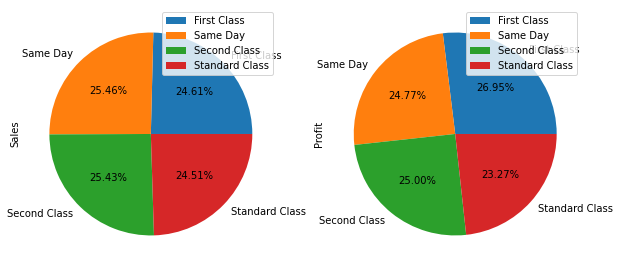

In [276]:
# Pie Plot for Sales and Profits according to Shipping Modes
ship_df.plot.pie(subplots=True,figsize=(10, 10), autopct='%.2f%%', labels = ship_df.index)



*   There is a small difference in **Sales which provides `0.95 % more sales` when used `First Class Delivery` (Highest) Service compared to `Standard Class Delivery` (Lowest).** Hence there is **NOT** much Difference.
*   There is a small difference in **Profits which provides 3.68 % more profits when used `First Class Delivery` (Highest) Service compared to `Standard Class Delivery` (Lowest).**





#**INSIGHTS**


*   Moderate Corrrelation between Profit and Sales.

*   Almost NO Correlation between Discount and Quantity or Discount and Sales. Also Low Negative Correlation between Discount and Profit.

*   Hence, **`Discount given by store is NOT useful`** as it is not able to boost Quantities sold or Sales and also affects profit in negatively.



*   **`California`** is the State with **`most Transactions/Orders`**.
*   **`Wyoming`** is the State with **`most Sales`**.
*   **`Vermont`** is the State with **`most Profits`** and **`Ohio`** is the State with **`most Losses`**.   



*   **`New York City`** has **`most Transactions/Orders`**.
*   **`Jamestown City`** has **`most Sales`**.
*   **`Jamestown City`** with **`most Profits`** and **`Bethlehem City`** has **`most Losses`**.



*  **` Maximum Sales and Profits`** in **`Technology`** Category.

*   **`Copiers`** have highest Sales as well as Profits.

*   **`Copiers`** have the highest sales with **`30.16 %`**.

*   **`Copiers`** have the highest sales with **`74.68 %`**.



*   Sales are almost equally distributed in all of the regions whereas **`WEST` has `Highest Profits` i.e. `30.24 %`** and **`CENTRAL` has `Lowest Profits` i.e. `15.27 %`**.    



*   There is a small difference in **Sales which provides `0.95 % more sales` when used `First Class Delivery` (Highest) Service compared to `Standard Class Delivery` (Lowest).** Hence there is **NOT** much Difference.

*   There is a small difference in **Profits which provides 3.68 % more profits when used `First Class Delivery` (Highest) Service compared to `Standard Class Delivery` (Lowest).**


















# THANK YOU